In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("Expanded_data_with_more_features.csv")

In [8]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [9]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [11]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [12]:
#drop unnamed column

In [13]:
df = df.drop("Unnamed: 0",axis=1 )

In [14]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [15]:
#change weekly study hours
#df["WklyStudyHours"] = df["WklyStudyHours].str.replace(original value,value to be replaced with)

In [16]:
#Gender Distribution

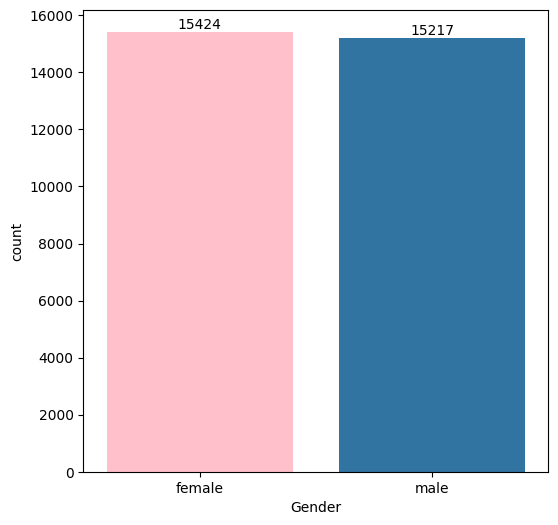

In [17]:
plt.figure(figsize= (6,6))
ax = sns.countplot(data = df, x = "Gender") #ax is axes object ref
ax.bar_label(ax.containers[0]) 
bar_to_change = 0
new_color = 'pink'
ax.patches[bar_to_change].set_fc(new_color)
plt.show()

#colors = ['blue',  'green']  # You can add more colors as needed
#ax = sns.countplot(data=df, x="Gender", palette=colors)

# From the above chart it is observed that number of females more than males

In [22]:
gb = df.groupby("ParentEduc").agg({"MathScore": "mean", "ReadingScore": "mean", "WritingScore": "mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


<function matplotlib.pyplot.show(close=None, block=None)>

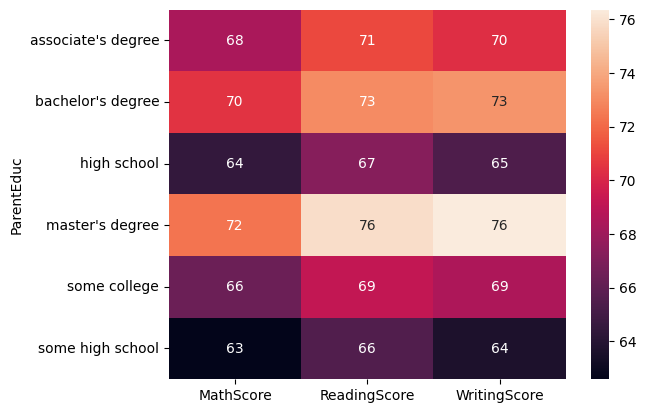

In [24]:
sns.heatmap(gb, annot = True)
plt.show

# As observed from the above map, the average marks of students having well-educated parents is higher as compared to the parents having only a High School Degree

In [27]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore": "mean", "ReadingScore": "mean", "WritingScore": "mean"})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


In [28]:
gb2 = df.groupby("WklyStudyHours").agg({"MathScore": "mean", "ReadingScore": "mean", "WritingScore": "mean"})
print(gb2)

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5 - 10          66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


In [29]:
gb3 = df.groupby("NrSiblings").agg({"MathScore": "mean", "ReadingScore": "mean", "WritingScore": "mean"})
print(gb3)

            MathScore  ReadingScore  WritingScore
NrSiblings                                       
0.0         66.819449     69.547812     68.746515
1.0         66.473896     69.259097     68.245345
2.0         66.554934     69.472018     68.522533
3.0         66.719092     69.488159     68.650498
4.0         66.245495     69.144169     68.073444
5.0         66.630303     69.453788     68.282576
6.0         65.917219     68.801325     67.860927
7.0         67.615120     69.828179     68.986254


In [30]:
gb4 = df.groupby("PracticeSport").agg({"MathScore": "mean", "ReadingScore": "mean", "WritingScore": "mean"})
print(gb4)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


In [35]:
gb5 = df.groupby("Gender").agg({"MathScore": "mean", "ReadingScore": "mean", "WritingScore": "mean"})
print(gb5)

        MathScore  ReadingScore  WritingScore
Gender                                       
female  64.080654     72.853216     72.856457
male    69.069856     65.854571     63.920418


<function matplotlib.pyplot.show(close=None, block=None)>

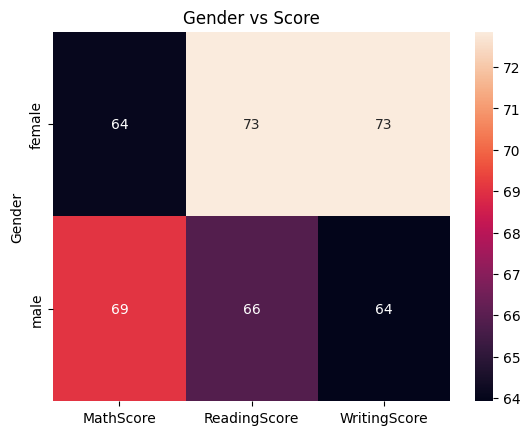

In [39]:
sns.heatmap(gb5, annot = True)
plt.title("Gender vs Score")
plt.show

In [33]:
gb6 = df.groupby("EthnicGroup").agg({"MathScore": "mean", "ReadingScore": "mean", "WritingScore": "mean"})
print(gb6)

             MathScore  ReadingScore  WritingScore
EthnicGroup                                       
group A      62.991888     66.787742     65.251915
group B      63.490216     67.320460     65.895125
group C      64.695723     68.438233     66.999240
group D      67.666400     70.382247     70.890844
group E      75.298936     74.251423     72.677060


<function matplotlib.pyplot.show(close=None, block=None)>

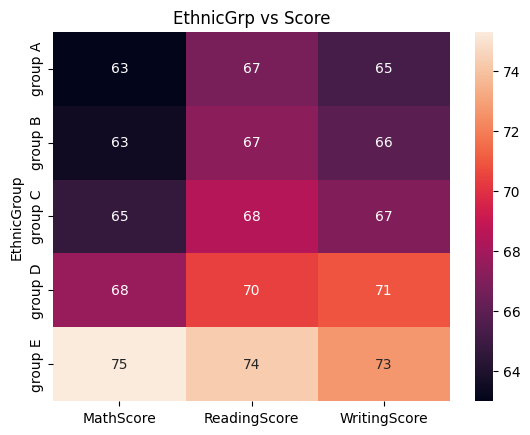

In [38]:
sns.heatmap(gb6, annot = True)
plt.title("EthnicGrp vs Score")
plt.show

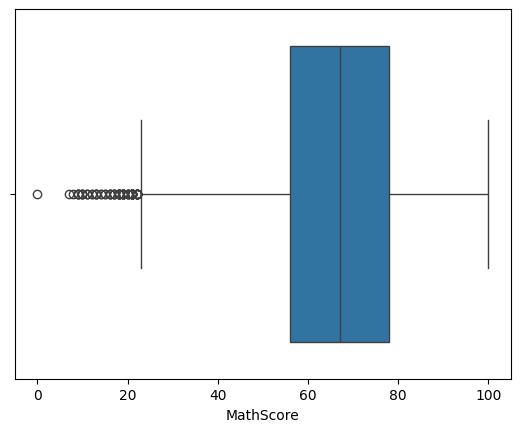

In [41]:
sns.boxplot(data = df, x= "MathScore")
plt.show()

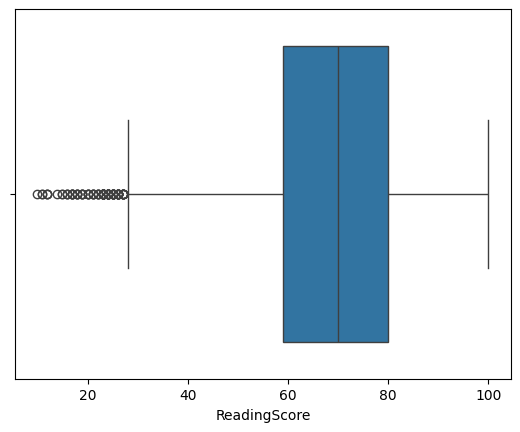

In [42]:
sns.boxplot(data = df, x= "ReadingScore")
plt.show()

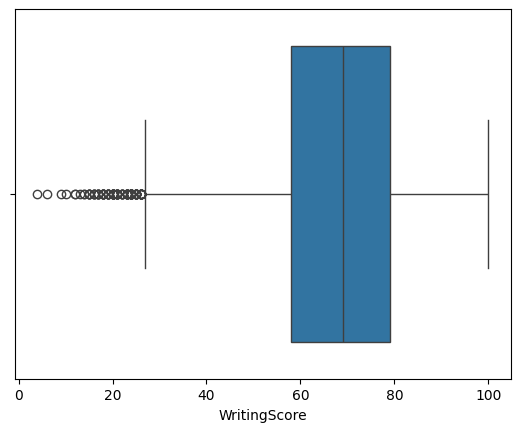

In [43]:
sns.boxplot(data = df, x= "WritingScore")
plt.show()

In [44]:
print(df ["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


In [ ]:
#groupA = df.loc[(df["EthnicGroup"] == "group A")].count()
#groupB = df.loc[(df["EthnicGroup"] == "group B")].count()
#groupC = df.loc[(df["EthnicGroup"] == "group C")].count()
#groupD = df.loc[(df["EthnicGroup"] == "group D")].count()
#groupE = df.loc[(df["EthnicGroup"] == "group E")].count()

#mlist = [groupA["EthnicGroup"]], [groupB["EthnicGroup"]], [groupC["EthnicGroup"]][groupD["EthnicGroup"]], [groupE["EthnicGroup"]]
#plt.pie(mlist)

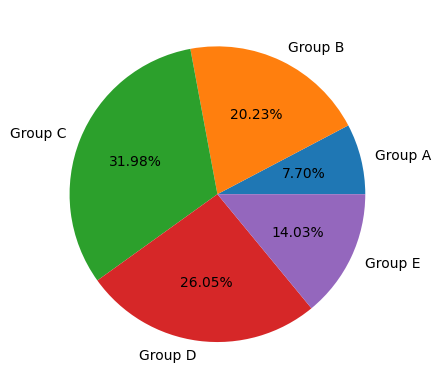

In [54]:
groupA = df.loc[(df["EthnicGroup"] == "group A")].shape[0]
groupB = df.loc[(df["EthnicGroup"] == "group B")].shape[0]
groupC = df.loc[(df["EthnicGroup"] == "group C")].shape[0]
groupD = df.loc[(df["EthnicGroup"] == "group D")].shape[0]
groupE = df.loc[(df["EthnicGroup"] == "group E")].shape[0]

# Create a 1D array or list with counts
counts = [groupA, groupB, groupC, groupD, groupE]

# Labels for the pie chart
labels = ["Group A", "Group B", "Group C", "Group D", "Group E"]

# Create a pie chart
plt.pie(counts, labels=labels, autopct='%1.2f%%')
plt.show()
